# LOAN APPLICATION STATUS PREDICTION

## Content

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc.
We have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset.

# Importing Data

In [1]:
import pandas as pd
loan_application_status=pd.read_csv('loan_application_status.csv')

# Putting data in Data Frame

In [2]:
la=pd.DataFrame(data=loan_application_status)
la

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# About the columns

1. Loan_ID :

Unique loan id of applicant

2. Gender :

Gender of applicant (Male/Female)

3. Married :

Marital status of the applicant

4. Dependents:

Number of dependents of applicant

5. Education:

Level of education of applicant

6. Self_Employed:

Is applicant self employeed or not

7. ApplicantIncome:

Income of applicant

8. CoapplicantIncome:

Income of Coapplicant (For a home loan, the most favoured co-applicant combination is a couple)

9. Loan_Amount:

Amount of loan

10. Loan_Amount_Term:

Total term of loan

11. Credit History:

A credit history is the record of how a person has managed his or her credit in the past, including total debt load, number of credit lines, and timeliness of payment.

12. Property_Area:

How is the area of property

13. Loan_Status:

Is loan approved or not

In [3]:
la.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
# Checking null values
la.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

**7 columns have the null values, which are 'Gender', 'Married', 'Dependents', 'Self Employed', 'LoanAmount', 'Loan_Amount_term', 'Credit_History'**

## Exploratory Data Analysis

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Checking rows and columns of dataset
la.shape

(614, 13)

In [7]:
la.head(4)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y


In [8]:
# Converting nan values into mode of their respective columns

from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy='most_frequent')

a=['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
for i in a:
    la[i]=imp.fit_transform(la[i].values.reshape(-1,1))

In [9]:
la.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

**No nan values are present in out dataset now**

In [10]:
la.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Unique Values : ['Female' 'Male']
Frequency Values : [112, 502]


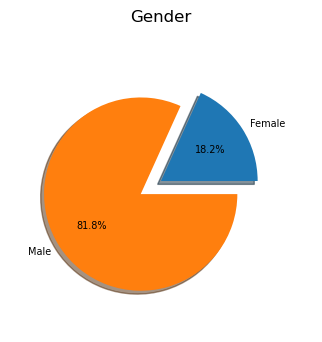

In [11]:
# Counting the frequency of unique elements
list_=la['Gender']

unique,frequency=np.unique(list_,return_counts=True)
frequency=list(frequency)

print('Unique Values :',unique)
print('Frequency Values :',frequency)

# Creating pie plot for Gender

max_val=max(frequency)
max_index=frequency.index(max_val)
myexplode=tuple([0 if i!=max_index else 0.2 for i in range(len(frequency))])

labels=unique
sizes=frequency
plt.figure(figsize=(4,4),dpi=100)
plt.pie(sizes,labels=labels, explode=myexplode , shadow=True, autopct='%1.1f%%', radius=0.8, textprops={'fontsize':7})
plt.title('Gender')
plt.show()

**Majority of applicants are men, more than 80 %**

Unique Values : ['No' 'Yes']
Frequency Values : [213, 401]


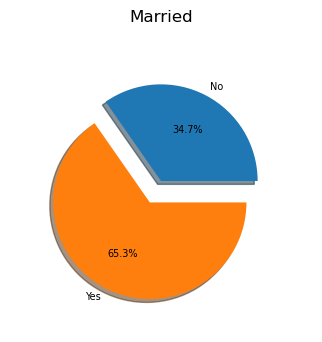

In [12]:
# Counting the frequency of unique elements
list_=la['Married']

unique,frequency=np.unique(list_,return_counts=True)
frequency=list(frequency)

print('Unique Values :',unique)
print('Frequency Values :',frequency)

# Creating pie plot for Marital Status

max_val=max(frequency)
max_index=frequency.index(max_val)
myexplode=tuple([0 if i!=max_index else 0.2 for i in range(len(frequency))])

labels=unique
sizes=frequency
plt.figure(figsize=(4,4),dpi=100)
plt.pie(sizes,labels=labels, explode=myexplode , shadow=True, autopct='%1.1f%%', radius=0.8, textprops={'fontsize':7})
plt.title('Married')
plt.show()

**65.3% people who applied for bank loan are married**

Unique Values : ['0' '1' '2' '3+']
Frequency Values : [360, 102, 101, 51]


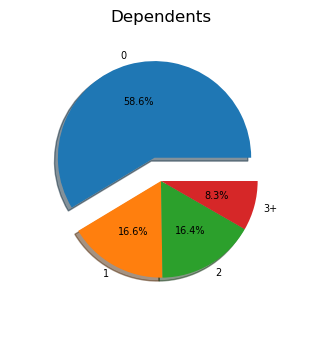

In [13]:
# Counting the frequency of unique elements
list_=la['Dependents']

unique,frequency=np.unique(list_,return_counts=True)
frequency=list(frequency)

print('Unique Values :',unique)
print('Frequency Values :',frequency)

# Creating pie plot for Dependents

max_val=max(frequency)
max_index=frequency.index(max_val)
myexplode=tuple([0 if i!=max_index else 0.2 for i in range(len(frequency))])

labels=unique
sizes=frequency
plt.figure(figsize=(4,4),dpi=100)
plt.pie(sizes,labels=labels, explode=myexplode , shadow=True, autopct='%1.1f%%', radius=0.8, textprops={'fontsize':7})
plt.title('Dependents')
plt.show()

**By above plot we can see most people have o dependents and least people have 3+ dependents**

Unique Values : ['Graduate' 'Not Graduate']
Frequency Values : [480, 134]


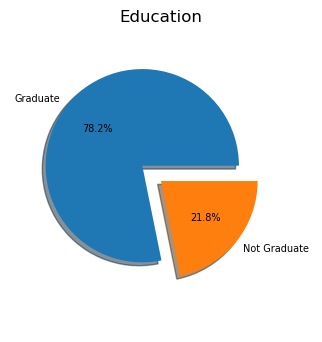

In [14]:
# Counting the frequency of unique elements
list_=la['Education']

unique,frequency=np.unique(list_,return_counts=True)
frequency=list(frequency)

print('Unique Values :',unique)
print('Frequency Values :',frequency)

# Creating pie plot for Education

max_val=max(frequency)
max_index=frequency.index(max_val)
myexplode=tuple([0 if i!=max_index else 0.2 for i in range(len(frequency))])

labels=unique
sizes=frequency
plt.figure(figsize=(4,4),dpi=100)
plt.pie(sizes,labels=labels, explode=myexplode , shadow=True, autopct='%1.1f%%', radius=0.8, textprops={'fontsize':7})
plt.title('Education')
plt.show()

**78.2% people who applied for loan are graduate and 21.8% are non graduage**

Unique Values : ['No' 'Yes']
Frequency Values : [532, 82]


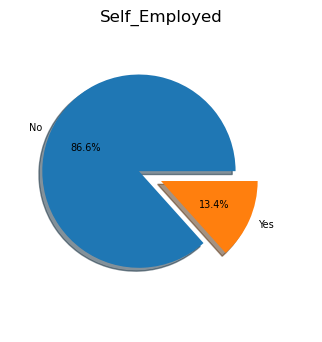

In [15]:
# Counting the frequency of unique elements
list_=la['Self_Employed']

unique,frequency=np.unique(list_,return_counts=True)
frequency=list(frequency)

print('Unique Values :',unique)
print('Frequency Values :',frequency)

# Creating pie plot for Self_Employed

max_val=max(frequency)
max_index=frequency.index(max_val)
myexplode=tuple([0 if i!=max_index else 0.2 for i in range(len(frequency))])

labels=unique
sizes=frequency
plt.figure(figsize=(4,4),dpi=100)
plt.pie(sizes,labels=labels, explode=myexplode , shadow=True, autopct='%1.1f%%', radius=0.8, textprops={'fontsize':7})
plt.title('Self_Employed')
plt.show()

**Only 13.4% people are self employed**

Unique Values : [0. 1.]
Frequency Values : [89, 525]


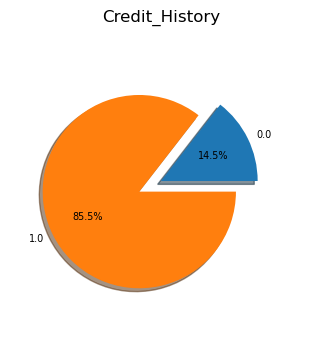

In [16]:
# Counting the frequency of unique elements
list_=la['Credit_History']

unique,frequency=np.unique(list_,return_counts=True)
frequency=list(frequency)

print('Unique Values :',unique)
print('Frequency Values :',frequency)

# Creating pie plot for Credit_History

max_val=max(frequency)
max_index=frequency.index(max_val)
myexplode=tuple([0 if i!=max_index else 0.2 for i in range(len(frequency))])

labels=unique
sizes=frequency
plt.figure(figsize=(4,4),dpi=100)
plt.pie(sizes,labels=labels, explode=myexplode , shadow=True, autopct='%1.1f%%', radius=0.8, textprops={'fontsize':7})
plt.title('Credit_History')
plt.show()

**Most people have the credit score of 1**

Unique Values : ['Rural' 'Semiurban' 'Urban']
Frequency Values : [179, 233, 202]


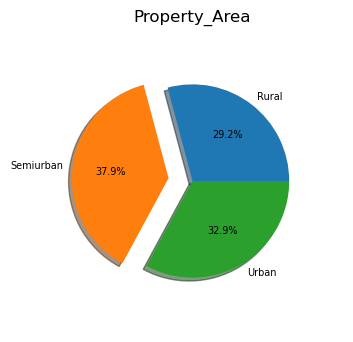

In [17]:
# Counting the frequency of unique elements
list_=la['Property_Area']

unique,frequency=np.unique(list_,return_counts=True)
frequency=list(frequency)

print('Unique Values :',unique)
print('Frequency Values :',frequency)

# Creating pie plot for Property_Area

max_val=max(frequency)
max_index=frequency.index(max_val)
myexplode=tuple([0 if i!=max_index else 0.2 for i in range(len(frequency))])

labels=unique
sizes=frequency
plt.figure(figsize=(4,4),dpi=100)
plt.pie(sizes,labels=labels, explode=myexplode , shadow=True, autopct='%1.1f%%', radius=0.8, textprops={'fontsize':7})
plt.title('Property_Area')
plt.show()

**Most people who applied for loan are from semiurban area**

Unique Values : ['N' 'Y']
Frequency Values : [192, 422]


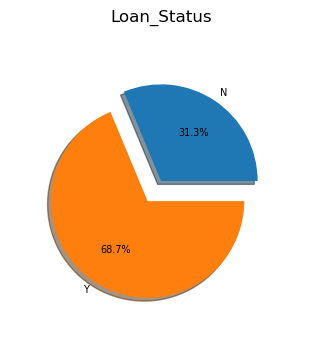

In [18]:
# Counting the frequency of unique elements
list_=la['Loan_Status']

unique,frequency=np.unique(list_,return_counts=True)
frequency=list(frequency)

print('Unique Values :',unique)
print('Frequency Values :',frequency)

# Creating pie plot for Loan_Status

max_val=max(frequency)
max_index=frequency.index(max_val)
myexplode=tuple([0 if i!=max_index else 0.2 for i in range(len(frequency))])

labels=unique
sizes=frequency
plt.figure(figsize=(4,4),dpi=100)
plt.pie(sizes,labels=labels, explode=myexplode , shadow=True, autopct='%1.1f%%', radius=0.8, textprops={'fontsize':7})
plt.title('Loan_Status')
plt.show()

**Loan of 68.7% people is approved**

Text(0, 0.5, 'Number of Applicants')

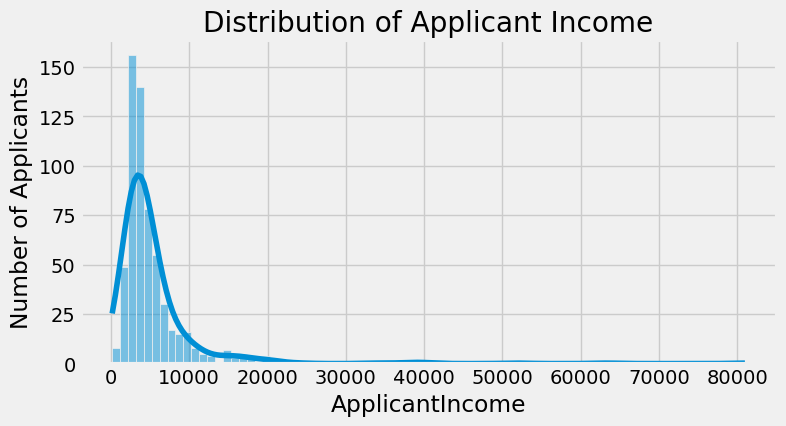

In [19]:
# Checking Distribution of Applicant income with histplot
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,4),dpi=100)
sns.histplot(data=la,x='ApplicantIncome',kde=True,bins=80)
plt.title('Distribution of Applicant Income')
plt.ylabel('Number of Applicants')

**Most of the population comes below 10000 of income, very few applicants are above 10000**

Text(0.5, 1.0, 'Distribution of Co Applicant Income')

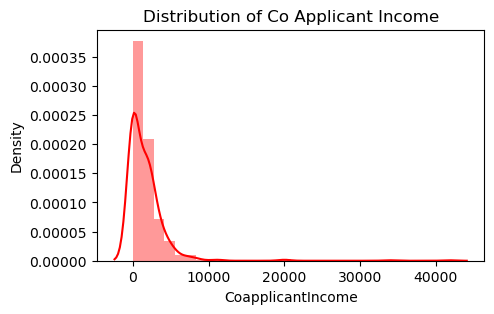

In [20]:
# Checking Distribution of Co applicant income
plt.style.use('default')
plt.figure(figsize=(5,3))
sns.distplot(la['CoapplicantIncome'],bins=30,color='red')
plt.title('Distribution of Co Applicant Income')

**Coapplicant income also comes under 10000 and very few are above that**

Text(0, 0.5, 'Number of Applicants')

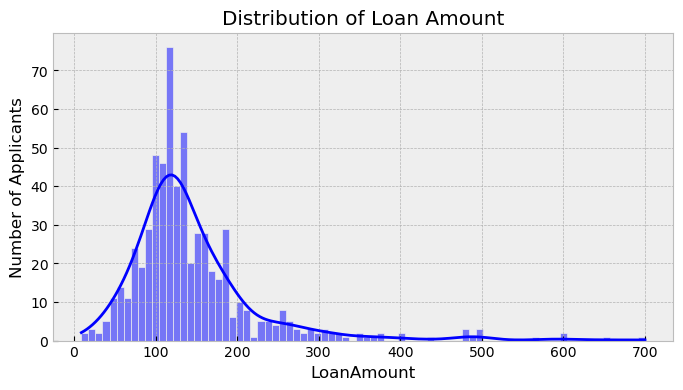

In [21]:
# Checking Distribution of Loan Amount with histplot
plt.style.use('bmh')
plt.figure(figsize=(8,4),dpi=100)
sns.histplot(data=la,x='LoanAmount',kde=True,bins=80)
plt.title('Distribution of Loan Amount')
plt.ylabel('Number of Applicants')

**Most people want the loan from 100 to 200**

Text(0, 0.5, 'Number of Applicant')

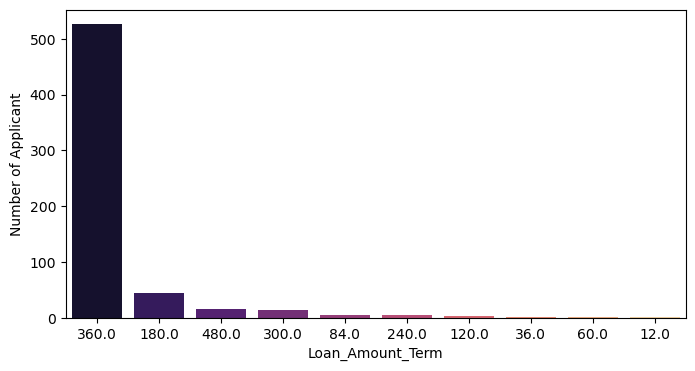

In [22]:
# Counting term loan of applicants
plt.style.use('default')
plt.figure(figsize=(8,4),dpi=100)
sns.countplot(data=la,x='Loan_Amount_Term',order=la['Loan_Amount_Term'].value_counts().index,palette='magma')
plt.ylabel('Number of Applicant')

**Most people have the term loan of 360 and very least people have the term loan of 12**

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

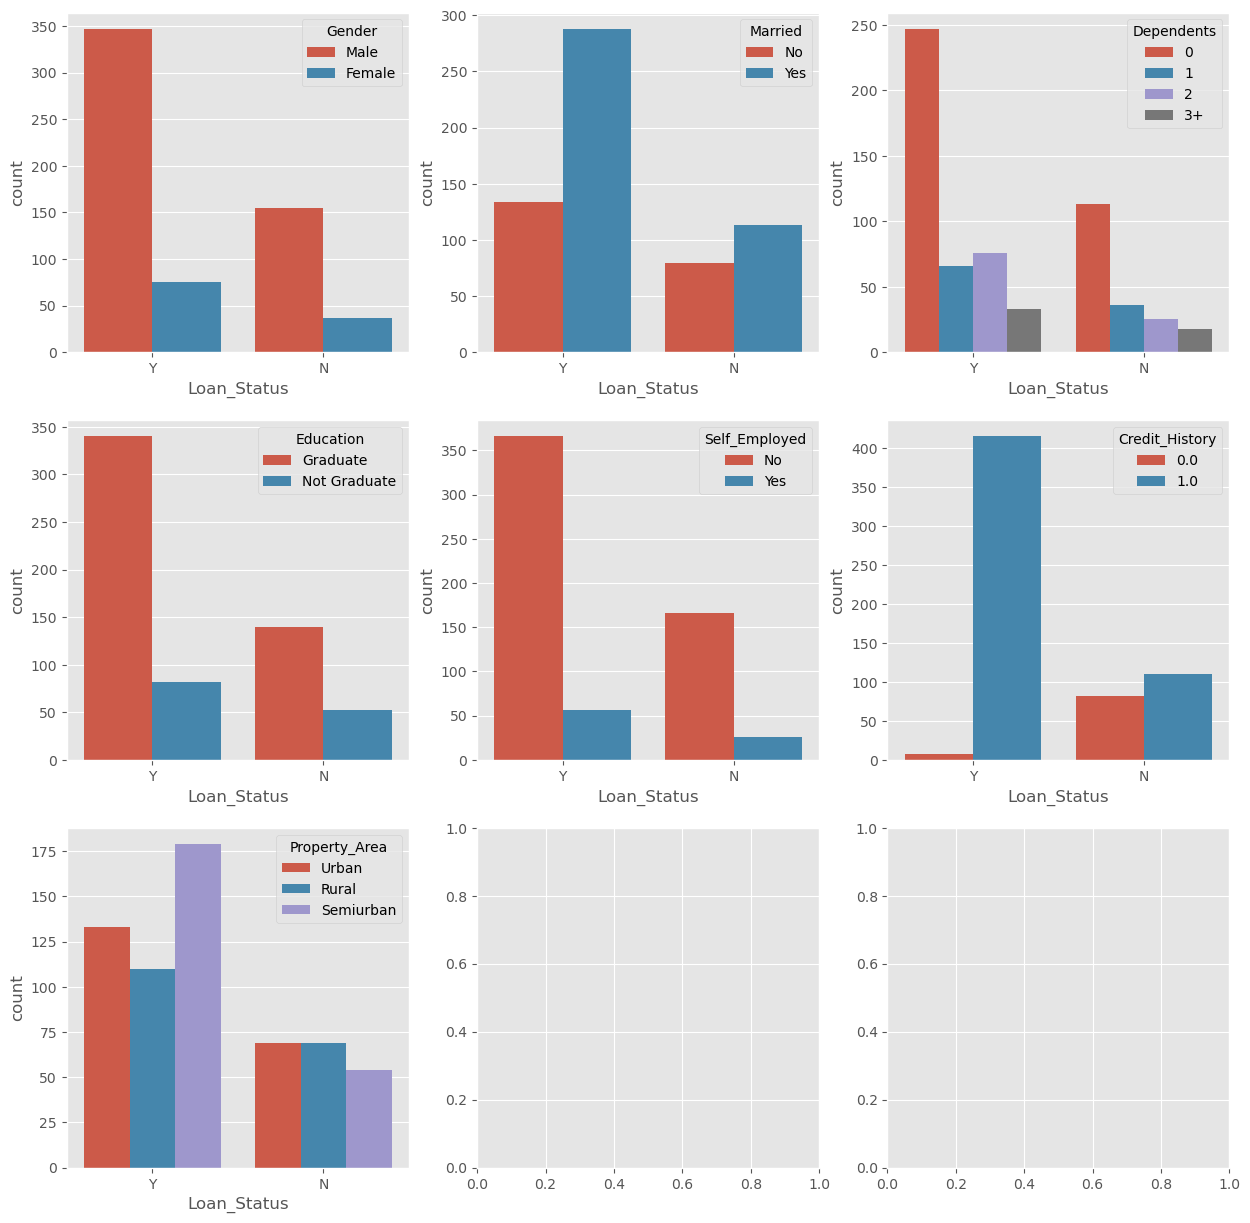

In [23]:
# Counting loan status of applicants with respect to different variables
plt.style.use('ggplot')
fig,ax=plt.subplots(3,3,figsize=(15,15))
sns.countplot(x='Loan_Status',hue='Gender',data=la, ax=ax[0][0])
sns.countplot(x='Loan_Status',hue='Married',data=la, ax=ax[0][1])
sns.countplot(x='Loan_Status',hue='Dependents',data=la, ax=ax[0][2])
sns.countplot(x='Loan_Status',hue='Education',data=la, ax=ax[1][0])
sns.countplot(x='Loan_Status',hue='Self_Employed',data=la, ax=ax[1][1])
sns.countplot(x='Loan_Status',hue='Credit_History',data=la, ax=ax[1][2])
sns.countplot(x='Loan_Status',hue='Property_Area',data=la, ax=ax[2][0])

**Above plot shows that if the loan is approved or not with different variables**

**Key Observations**

1. Most number of males loan gets approved.

2. People who are married mostly gets approval of loan.

3. Applicants with 0 dependents have more chances of getting their loan approved.

4. Graduated applicants have more chances of getting their loan approved.

5. Self employed people easily gets loan approval.

6. People with the credit history of one are more likely to get their loan approved.

In [24]:
la.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [25]:
# Converting loan status into numeric by applying label encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

la['Loan_Status']=le.fit_transform(la['Loan_Status'].astype(str))

In [26]:
la['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [27]:
# Checking Correlation
la.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.564698,-0.046531,-0.018615,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.189723,-0.059383,0.011134,-0.059187
LoanAmount,0.564698,0.189723,1.000000,0.037152,-0.000250,-0.031808
Loan_Amount_Term,-0.046531,-0.059383,0.037152,1.000000,-0.004705,-0.022549
Credit_History,-0.018615,0.011134,-0.000250,-0.004705,1.000000,0.540556
Loan_Status,-0.004710,-0.059187,-0.031808,-0.022549,0.540556,1.000000


<AxesSubplot:>

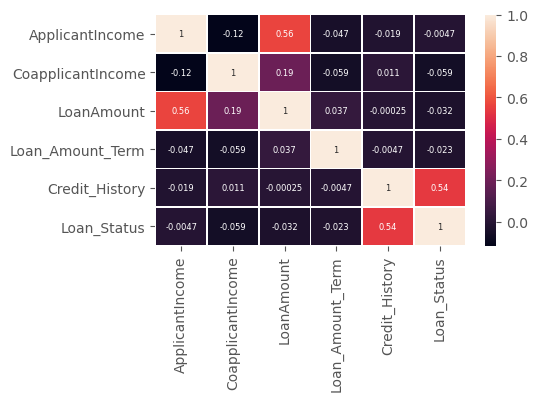

In [28]:
# plotting heatmap to see the correlation
plt.figure(figsize=(5,3),dpi=100)
sns.heatmap(la.corr(),annot=True,linewidth=0.5,linecolor='White',annot_kws={'fontsize':6})

**All variables are negatively correlated with loan status except credit history**

**Applicant Income is highly correlated with loan amount**

In [29]:
la['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [30]:
# We have to take care of categorical data in Dependents variables
la['Dependents'].replace('0',0, inplace=True)
la['Dependents'].replace('1',1, inplace=True)
la['Dependents'].replace('2',2, inplace=True)
la['Dependents'].replace('3+',3, inplace=True)

In [31]:
la['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [32]:
la.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [33]:
la.shape

(614, 13)

In [34]:
# Creating Variance Inflation Factor function
la_=la.copy()
la_.drop(columns=['Loan_ID','Gender','Married','Education','Self_Employed','Property_Area'],inplace=True)         # They are not numeric

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

lac_=add_constant(la_)
def lac_vif():
    vif=pd.DataFrame()
    vif['Variables']=lac_.columns
    vif['VIF Factor']=[variance_inflation_factor(lac_.values,i)
                       for i in range(lac_.shape[1])]
    return (vif)

In [35]:
lac_vif()

,Variables,VIF Factor
0,const,39.751591
1,Dependents,1.044358
2,ApplicantIncome,1.608591
3,CoapplicantIncome,1.138195
4,LoanAmount,1.669505
5,Loan_Amount_Term,1.029981
6,Credit_History,1.422321
7,Loan_Status,1.425889


**We have calculated the Variance Inflation Factor for the above Variables.**

In [36]:
la.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.744300,5403.459283,1621.245798,145.465798,342.410423,0.855049,0.687296
std,1.009623,6109.041673,2926.248369,84.180967,64.428629,0.352339,0.463973
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000
50%,0.000000,3812.500000,1188.500000,125.000000,360.000000,1.000000,1.000000
75%,1.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000


## Outliers

In [37]:
la.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


<AxesSubplot:>

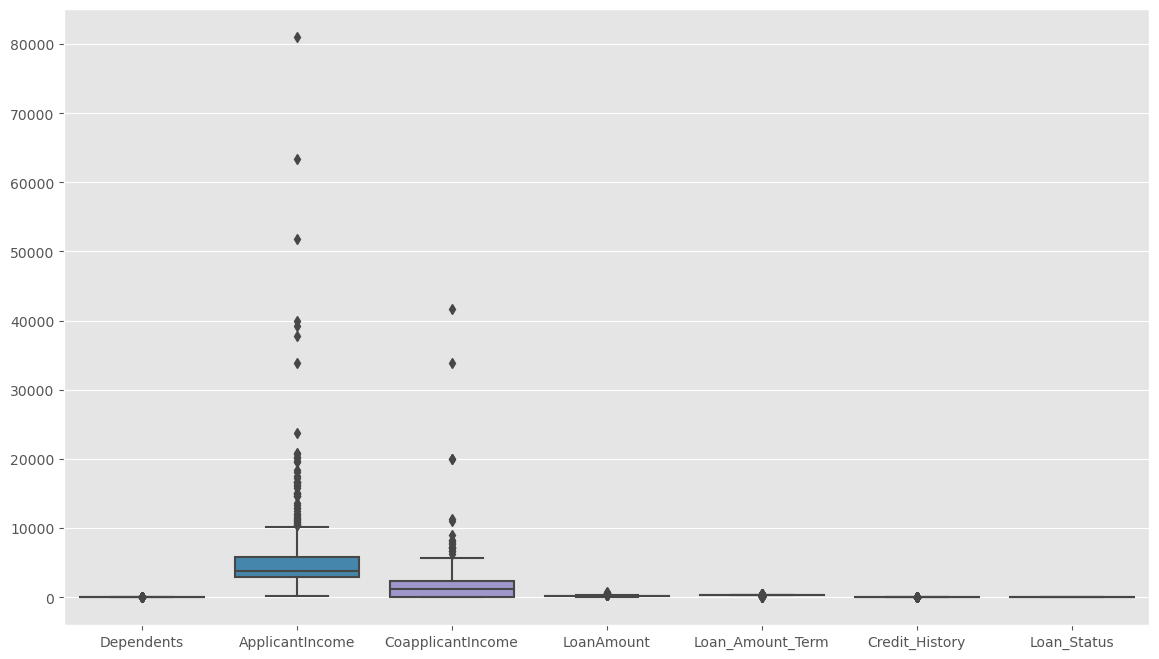

In [38]:
# Checking outliers by plotting dataset into boxplot
plt.figure(figsize=(14,8),dpi=100)
sns.boxplot(data=la)

**We can see that all the above variables have outliers except Loan_status**

## Removing Outliers

In [39]:
la.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [40]:
# Checking presence of skewness in the data
la.skew()

Dependents           1.015551
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.745407
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Loan_Status         -0.809998
dtype: float64

**Skewness is present in variable 'Applicant Income' and 'Coapplicant Income'**

In [41]:
# Removing Outliers
from numpy import percentile

a=la.columns
for i in a:
    if isinstance(la[i][0],str):
        continue
    else:
        # Quartiles
        q=percentile(la[i],[25,75])
        # Lower & Upper bound
        lower_bound= q[0] - (1.5*(q[1]-q[0]))
        upper_bound= q[1] + (1.5*(q[1]-q[0]))
        la[i] = la[i].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

**We have removed the outliers higher than the upper whisker by the value of the upper whisker and the outliers lower than the lower whisker by the value of the lower whisker.**

## Again checking the Outliers

<AxesSubplot:>

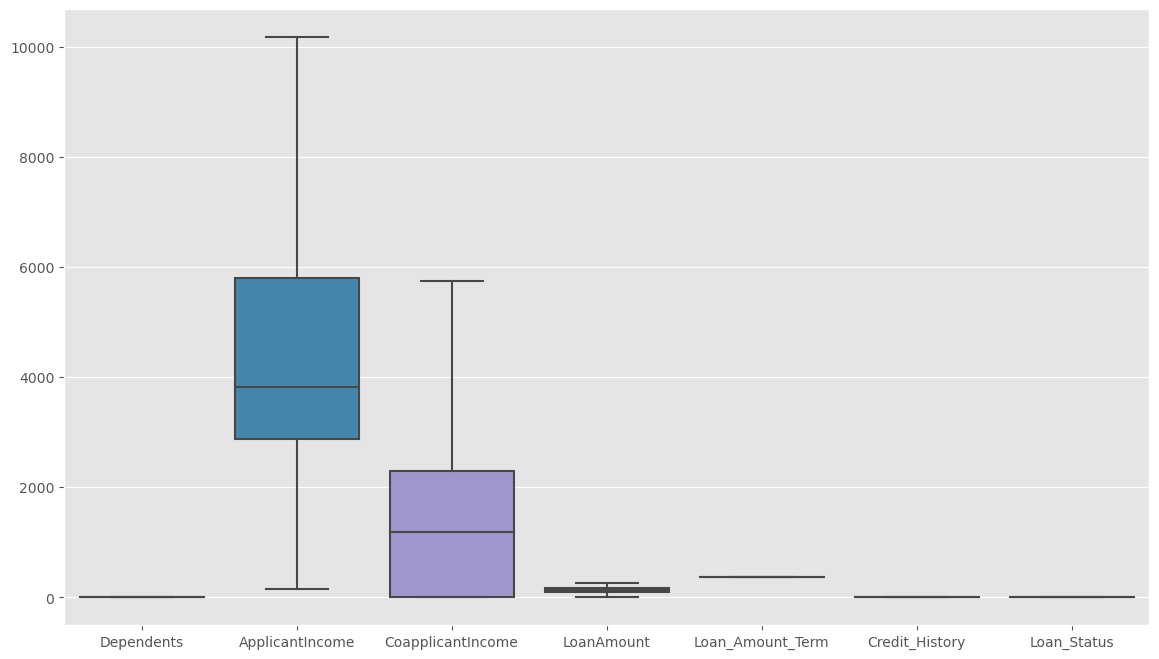

In [42]:
plt.figure(figsize=(14,8),dpi=100)
sns.boxplot(data=la)

**We can see that there are no outliers present in our data.**

In [43]:
la.head(4)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849.0,0.0,120.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1.0,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,1


### Converting Categorical data of "la" into integer

**Now we will convert the categorical variable like 'Gender','Married','Education','Self_Employed','Property_Area' into numeric.**

**We will apply label encoder to these variables except Property Area, it will convert the categorical data into numeric.**

**We will apply get_dummies to varable "Property_Area", it will create equal number of columns with 1's and 0's, 1 will indicated that category is present and 0 will indicate absent**

In [44]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

d=['Gender','Married','Education','Self_Employed']
for i in d:
    la[i]=le.fit_transform(la[i].astype(str))

In [45]:
la.head(4)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0.0,0,0,5849.0,0.0,120.0,360.0,1.0,Urban,1
1,LP001003,1,1,1.0,0,0,4583.0,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,1,1,0.0,0,1,3000.0,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,1,1,0.0,1,0,2583.0,2358.0,120.0,360.0,1.0,Urban,1


In [46]:
property_area_dummies=pd.get_dummies(la.Property_Area,prefix='Property_Area')
property_area_dummies

,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
609,1,0,0
610,1,0,0
611,0,0,1
612,0,0,1


In [47]:
la=pd.concat([la,property_area_dummies],axis=1)
la.drop(columns='Property_Area',inplace=True)
la.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,1,0,0.0,0,0,5849.0,0.0,120.0,360.0,1.0,1,0,0,1
1,LP001003,1,1,1.0,0,0,4583.0,1508.0,128.0,360.0,1.0,0,1,0,0
2,LP001005,1,1,0.0,0,1,3000.0,0.0,66.0,360.0,1.0,1,0,0,1
3,LP001006,1,1,0.0,1,0,2583.0,2358.0,120.0,360.0,1.0,1,0,0,1
4,LP001008,1,0,0.0,0,0,6000.0,0.0,141.0,360.0,1.0,1,0,0,1


**Now our categorical data in converted into numeric.**

## Model Creation

In [48]:
x=la.drop(columns=['Loan_ID','Loan_Status'])
y=la[['Loan_Status']]

print(x.shape)
print(y.shape)

(614, 13)
(614, 1)


**We have created two variables containing Input data (x) and Output data (y).**

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=50)

**We've splitted our dataset into training and testing, where we have used our 80% of data for training and 20% of data for testing**

### Scaling x_train and x_test using Standard Scaler

In [50]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

**Making a function to calculate and print following features for the model : Accuracy Score, Confusion Matrix, Classification Report.**

In [52]:
# Creating function for checking accuracy score, confusion matrix and classification report of prediction models
def classifier_func(y_test,pred):
    ac=accuracy_score(y_test,pred)
    cm=confusion_matrix(y_test,pred)
    cr=classification_report(y_test,pred)
    
    print('Accuracy Score :',ac,'\n')
    print('Confusion Matrix :',cm,'\n')
    print('Classification Report :',cm,'\n')

**Making a Cross Validation function**

In [53]:
from sklearn.model_selection import cross_val_score
def cross_val_accuracy(model,x_train=x_train,y_train=y_train):
    accuracies=cross_val_score(estimator=model,X = x_train, y = y_train ,cv=10)
    print('Cross_val_Accuracy: {:.2f} %'.format(accuracies.mean()*100),'\n')
    print('Cross_val_Standard Deviation: {:.2f} %'.format(accuracies.std()*100),'\n')

### Logistic Regression

**Creating Logistic Regression Model, it'll fit the Logistic Regression model on x_train and y_train and predict the x_test and store it in pred. We will print predicted Loan_Status and actual Loan_Status and outputs of the above functions**

In [54]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)

print('\033[1m' + 'LOGISTIC REGRESSION MODEL SUMMERY\n' + '\033[0m')
classifier_func(y_test,pred)
cross_val_accuracy(lr)

print('Predicted Loan Status',pred)
print('\nActual Loan Status\n',y_test)

LOGISTIC REGRESSION MODEL SUMMERY

Accuracy Score : 0.6422764227642277 

Confusion Matrix : [[ 1 42]
 [ 2 78]] 

Classification Report : [[ 1 42]
 [ 2 78]] 

Cross_val_Accuracy: 68.64 % 

Cross_val_Standard Deviation: 3.07 % 

Predicted Loan Status [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1]

Actual Loan Status
      Loan_Status
18             0
175            1
287            1
409            0
302            1
..           ...
421            0
306            1
382            1
42             1
512            1

[123 rows x 1 columns]


### Decision Tree Classifier

**Creating Decision Tree Classifier Model, it'll fit the Decision Tree Classifier model on x_train and y_train and predict the x_test and store it in pred_dtc. We will print predicted Loan_Status and actual Loan_Status and outputs of the above functions**

In [55]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred_dtc=dtc.predict(x_test)

print('\033[1m' + 'DECISION TREE CLASSIFIER MODEL SUMMERY\n' + '\033[0m')
classifier_func(y_test,pred_dtc)
cross_val_accuracy(dtc)

print('Predicted Loan Status',pred_dtc)
print('\nActual Loan Status\n',y_test)

DECISION TREE CLASSIFIER MODEL SUMMERY

Accuracy Score : 0.4959349593495935 

Confusion Matrix : [[ 7 36]
 [26 54]] 

Classification Report : [[ 7 36]
 [26 54]] 

Cross_val_Accuracy: 57.03 % 

Cross_val_Standard Deviation: 5.56 % 

Predicted Loan Status [0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1
 0 1 0 1 1 1 1 0 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 0 0
 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1
 1 0 0 1 1 1 1 1 0 1 1 1]

Actual Loan Status
      Loan_Status
18             0
175            1
287            1
409            0
302            1
..           ...
421            0
306            1
382            1
42             1
512            1

[123 rows x 1 columns]


### KNeighbors Classifier

**Creating KNeighbors Classifier Model, it'll fit the KNeighbors Classifier model on x_train and y_train and predict the x_test and store it in pred_knc. We will print predicted Loan_Status and actual Loan_Status and outputs of the above functions**

In [56]:
knc=KNeighborsClassifier()
knc.fit(x_train,y_train)
pred_knc=knc.predict(x_test)

print('\033[1m' + 'KNEIGHBORS CLASSIFIER MODEL SUMMERY\n' + '\033[0m')
classifier_func(y_test,pred_knc)
cross_val_accuracy(knc)

print('Predicted Loan Status',pred_knc)
print('\nActual Loan Status\n',y_test)

KNEIGHBORS CLASSIFIER MODEL SUMMERY

Accuracy Score : 0.6260162601626016 

Confusion Matrix : [[ 5 38]
 [ 8 72]] 

Classification Report : [[ 5 38]
 [ 8 72]] 

Cross_val_Accuracy: 62.75 % 

Cross_val_Standard Deviation: 4.87 % 

Predicted Loan Status [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1
 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1]

Actual Loan Status
      Loan_Status
18             0
175            1
287            1
409            0
302            1
..           ...
421            0
306            1
382            1
42             1
512            1

[123 rows x 1 columns]


### Gradient Boosting Classifier

**Creating Gradient Boosting Classifier Model, it'll fit the Gradient Boosting Classifier model on x_train and y_train and predict the x_test and store it in pred_gc. We will print predicted Loan_Status and actual Loan_Status and outputs of the above functions**

In [57]:
gc=GradientBoostingClassifier()
gc.fit(x_train,y_train)
pred_gc=gc.predict(x_test)

print('\033[1m' + 'GRADIENT BOOSTING CLASSIFIER MODEL SUMMERY\n' + '\033[0m')
classifier_func(y_test,pred_gc)
cross_val_accuracy(gc)

print('Predicted Loan Status',pred_gc)
print('\nActual Loan Status\n',y_test)

GRADIENT BOOSTING CLASSIFIER MODEL SUMMERY

Accuracy Score : 0.6016260162601627 

Confusion Matrix : [[ 7 36]
 [13 67]] 

Classification Report : [[ 7 36]
 [13 67]] 

Cross_val_Accuracy: 65.99 % 

Cross_val_Standard Deviation: 4.38 % 

Predicted Loan Status [1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1]

Actual Loan Status
      Loan_Status
18             0
175            1
287            1
409            0
302            1
..           ...
421            0
306            1
382            1
42             1
512            1

[123 rows x 1 columns]


### The best performing model for "Loan Status" is Logistic Regression

### Model Saving

In [58]:
import pickle
filename='loan_status_model.pkl'
pickle.dump(lr,open(filename,'wb'))

**Logistic Regression Model is saved with the name "loan_status_model"**

## Conclusion

In [59]:
# printing the predicted result and the actual result
print('Predicted Result','\n', pred)
print('Actual Result','\n', y_test)

Predicted Result 
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1]
Actual Result 
      Loan_Status
18             0
175            1
287            1
409            0
302            1
..           ...
421            0
306            1
382            1
42             1
512            1

[123 rows x 1 columns]


**As we can see above the model is predicted quite well**

# THE END